In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [20]:
df=pd.read_csv('0100leu89ft.csv',delimiter=",")
df.head(5)

,location,SCRMSD,CARMSD,CHI1,CHI2,SELFDIHED,SELFVDW,SELFELEC,SelfALL,MBDIHED,MBVDW,MBELEC,MBALL,SCHBOND#
0,LOW,0.355345,0.256193,-147.515411,53.508400,3.887751,0.403015,8.067721,20.031511,1.017953,-9.429284,-30.596049,-38.942355,3
1,LOW,0.605549,0.127604,-158.578873,64.957588,3.310061,0.351081,8.016348,20.840695,0.732616,-9.951947,-25.882230,-34.407366,1
2,LOW,0.647490,0.255585,-165.717285,56.551693,3.377258,0.330532,8.587244,24.702449,1.153298,-10.808672,-30.765902,-39.712960,1
3,LOW,0.822144,0.414241,-166.462830,50.175953,2.890941,0.557575,8.490858,20.957459,0.242466,-10.311595,-28.185566,-37.839885,1
4,LOW,0.608519,0.241132,-149.661606,70.794235,4.456279,0.441016,8.031332,21.847960,0.662844,-11.297873,-28.420036,-38.408539,1


In [21]:
df['location'].nunique()

3

In [22]:
df.isnull().sum()

location     0
SCRMSD       0
CARMSD       0
CHI1         0
CHI2         0
SELFDIHED    0
SELFVDW      0
SELFELEC     0
SelfALL      0
MBDIHED      0
MBVDW        0
MBELEC       0
MBALL        0
SCHBOND#     0
dtype: int64

In [65]:
enc=preprocessing.LabelEncoder()

df['location'] = enc.fit_transform(df['location'])
y = df[['location']]
x = df[df.columns[1:]]


In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

In [67]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.04071726247299379

In [68]:
lm.score(X_test, y_test)

0.04390480977444511

In [69]:
        print("The linear model is: Y = {:.5} + {:.5}*cav1 + {:.5}*cav2 + {:.5}*cav3+ {:.5}*cav4".format(lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1], lm.coef_[0][2], lm.coef_[0][3]))

The linear model is: Y = 2.3241 + -0.14473*cav1 + 0.12332*cav2 + 0.0031391*cav3+ 0.0036297*cav4


In [73]:
X = np.column_stack((df['SCRMSD'], df['CARMSD'], df['CHI1'],df['CHI2'],df['SELFDIHED'],df['SELFVDW'],df['SELFELEC'],df['SelfALL'],df['MBDIHED'],df['MBVDW'],df['MBELEC'],df['MBALL'],df['SCHBOND#']))
y = df['location']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               location   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     42.99
Date:                Fri, 01 May 2020   Prob (F-statistic):          1.33e-108
Time:                        17:10:34   Log-Likelihood:                -15328.
No. Observations:               12750   AIC:                         3.068e+04
Df Residuals:                   12736   BIC:                         3.079e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1634      0.214     10.115      0.0

Best alpha using built-in LassoCV: 3.095375
Best score using built-in LassoCV: 0.000000
Lasso picked 1 variables and eliminated the other 12 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

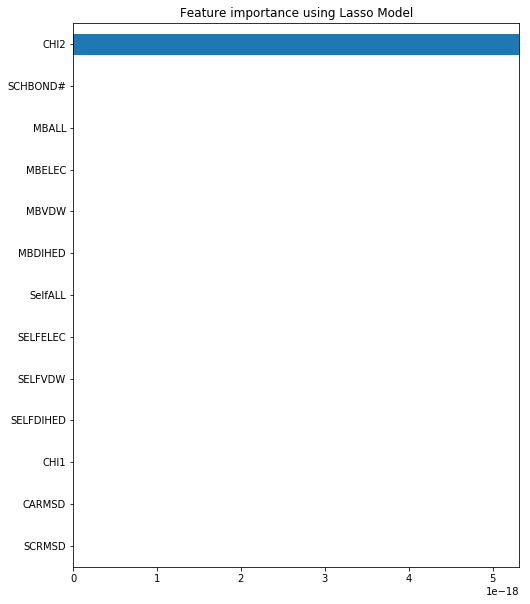

In [74]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [75]:
df.describe()

,location,SCRMSD,CARMSD,CHI1,CHI2,SELFDIHED,SELFVDW,SELFELEC,SelfALL,MBDIHED,MBVDW,MBELEC,MBALL,SCHBOND#
count,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000,12750.000000
mean,1.098039,0.894963,0.582334,-140.592907,57.864762,3.615084,0.891645,7.605594,23.783152,0.974003,-11.516121,-26.637363,-36.703792,1.216784
std,0.822627,0.406708,0.219794,30.701559,25.369650,0.586932,0.800441,0.719131,2.071232,0.569191,1.653128,1.741880,2.218219,0.466529
min,0.000000,0.148588,0.023591,-179.930328,-179.957214,2.248211,-1.095073,5.346896,17.133294,0.027781,-16.781096,-34.598112,-44.192224,0.000000
25%,0.000000,0.599010,0.423036,-157.849636,54.899139,3.190220,0.318531,7.107777,22.328397,0.566145,-12.658761,-27.783855,-38.224054,1.000000
50%,1.000000,0.793289,0.573771,-152.530533,60.267228,3.537322,0.797801,7.563736,23.639213,0.855990,-11.606491,-26.578857,-36.765803,1.000000
75%,2.000000,1.093560,0.729284,-144.635643,65.639850,3.952597,1.357529,8.069070,25.097037,1.251116,-10.487245,-25.441361,-35.246472,1.000000
max,2.000000,2.371461,1.647659,179.093369,179.877319,7.327453,5.263958,11.326908,32.662894,4.889210,-3.652790,-19.451467,-27.711963,4.000000


In [76]:
#Train and fit Logistic Regression model.
LoRmod=LogisticRegression(max_iter=10000)
LoRmod.fit(X_train,y_train)
#Score LR training
LoRmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.435

In [77]:
#Predict from manufactured test and score
LoRpred= LoRmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,LoRpred)*100)
print('F1 score:', f1_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, LoRpred))
print('Classification report:', classification_report(y_test, LoRpred))

Accuracy score: 45.490196078431374
F1 score: 41.941965413552616
Recall score: 42.60263481036743
Precision score: 45.39441998018306
Confusion matrix: [[168 133 411]
 [100 293 419]
 [101 226 699]]
Classification report:               precision    recall  f1-score   support

           0       0.46      0.24      0.31       712
           1       0.45      0.36      0.40       812
           2       0.46      0.68      0.55      1026

    accuracy                           0.45      2550
   macro avg       0.45      0.43      0.42      2550
weighted avg       0.45      0.45      0.43      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [87]:
k_list=[]
for i in range(1,100):
  classifier=KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  k_list.append(classifier.score(X_test,y_test))

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

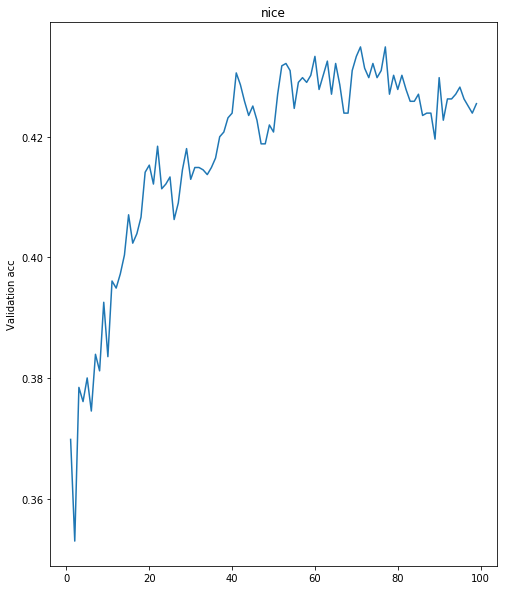

In [88]:
plt.plot(range(1,100),k_list)
plt.ylabel('Validation acc')
plt.title('nice')
plt.show()

In [89]:
KNNmod=KNeighborsClassifier(n_neighbors=60)
KNNmod.fit(X_train,y_train)
#Score RF fit.
KNNmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.4615686274509804

In [90]:
#Predict from manufactured test and score
KNNpred = KNNmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,KNNpred)*100)
print('F1 score:', f1_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, KNNpred))
print('Classification report:', classification_report(y_test, KNNpred))

Accuracy score: 43.333333333333336
F1 score: 41.01134561397049
Recall score: 41.197190962683734
Precision score: 42.70254384727512
Confusion matrix: [[200 142 370]
 [129 284 399]
 [151 254 621]]
Classification report:               precision    recall  f1-score   support

           0       0.42      0.28      0.34       712
           1       0.42      0.35      0.38       812
           2       0.45      0.61      0.51      1026

    accuracy                           0.43      2550
   macro avg       0.43      0.41      0.41      2550
weighted avg       0.43      0.43      0.42      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [91]:
SVCmod=SVC(kernel='rbf',gamma=0.1)
SVCmod.fit(X_train,y_train)
#Score DT fit.
SVCmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7528431372549019

In [97]:
gammalist=[]
for i in range(1,11):
    SVCmod=SVC(kernel='rbf',gamma=float(i/10))
    SVCmod.fit(X_train,y_train)
    gammalist.append(SVCmod.score(X_train, y_train))
    
print(gammalist)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.7528431372549019, 0.9163725490196079, 0.9790196078431372, 0.9957843137254901, 0.9990196078431373, 0.9999019607843137, 1.0, 1.0, 1.0, 1.0]


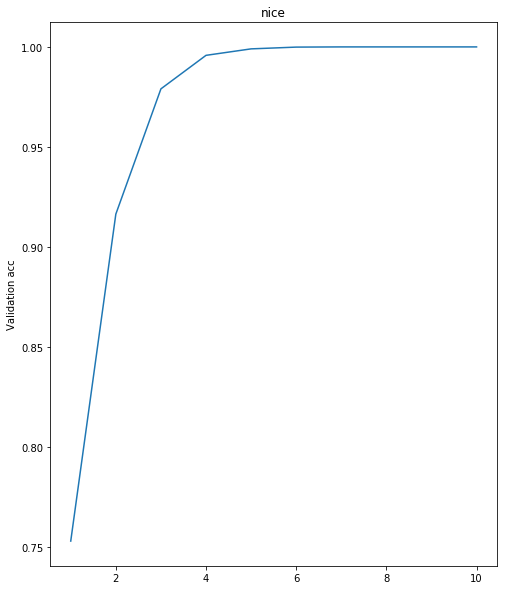

In [109]:
plt.plot(range(1,11),gammalist)
plt.ylabel('Validation acc')
plt.title('nice')
plt.show()

In [110]:
SVCmod=SVC(kernel='rbf',gamma=0.2)
SVCmod.fit(X_train,y_train)
#Score DT fit.
SVCmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9957843137254901

In [99]:
#Predict from manufactured test and score
SVCpred = SVCmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,SVCpred)*100)
print('F1 score:', f1_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, SVCpred))
print('Classification report:', classification_report(y_test, SVCpred))

Accuracy score: 40.431372549019606
F1 score: 36.473173698556685
Recall score: 37.55223319898035
Precision score: 38.78764331469888
Confusion matrix: [[163 147 402]
 [124 201 487]
 [145 214 667]]
Classification report:               precision    recall  f1-score   support

           0       0.38      0.23      0.28       712
           1       0.36      0.25      0.29       812
           2       0.43      0.65      0.52      1026

    accuracy                           0.40      2550
   macro avg       0.39      0.38      0.36      2550
weighted avg       0.39      0.40      0.38      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [100]:
#Train and fit Random Forest model.
RFmod=RandomForestClassifier(n_estimators=100,random_state=77)
RFmod.fit(X_train,y_train)
#Score RF fit.
RFmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [101]:
#Predict from manufactured test and score
RFpred = RFmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,RFpred)*100)
print('F1 score:', f1_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, RFpred))
print('Classification report:', classification_report(y_test, RFpred))

Accuracy score: 47.411764705882355
F1 score: 45.714587156141164
Recall score: 45.686265508074
Precision score: 46.59623373979149
Confusion matrix: [[250 146 316]
 [157 330 325]
 [171 226 629]]
Classification report:               precision    recall  f1-score   support

           0       0.43      0.35      0.39       712
           1       0.47      0.41      0.44       812
           2       0.50      0.61      0.55      1026

    accuracy                           0.47      2550
   macro avg       0.47      0.46      0.46      2550
weighted avg       0.47      0.47      0.47      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [102]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.04071726247299379

In [103]:
lm.score(X_test, y_test)

0.04390480977444511

In [31]:
#print("The linear model is: Y = {:.5} + {:.5}*x1 + {:.5}*x2 + {:.5}*x3+ {:.5}*cav4".format(lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1], lm.coef_[0][2], lm.coef_[0][3]))

The linear model is: Y = 1.106 + 0.0028371*cav1 + 0.0053549*cav2 + 0.022616*cav3+ 0.0022858*cav4


In [104]:
X = np.column_stack((df['SCRMSD'], df['CARMSD'], df['CHI1'],df['CHI2'],df['SELFDIHED'],df['SELFVDW'],df['SELFELEC'],df['SelfALL'],df['MBDIHED'],df['MBVDW'],df['MBELEC'],df['MBALL'],df['SCHBOND#']))
y = df['location']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               location   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     42.99
Date:                Fri, 01 May 2020   Prob (F-statistic):          1.33e-108
Time:                        17:21:19   Log-Likelihood:                -15328.
No. Observations:               12750   AIC:                         3.068e+04
Df Residuals:                   12736   BIC:                         3.079e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1634      0.214     10.115      0.0

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

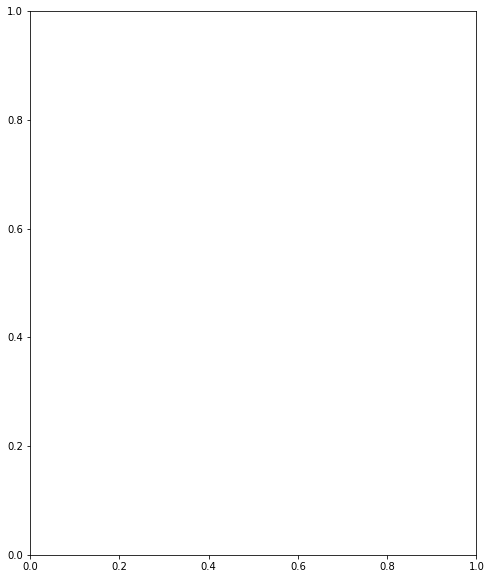

In [62]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['cav1', 'cav2','cav3','cav4']
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)

In [111]:
DTmod=DecisionTreeClassifier(criterion='gini', random_state = 77,max_depth=10)
DTmod.fit(X_train,y_train)
#Score DT fit.
DTmod.score(X_train, y_train)

0.5463725490196079

In [112]:
#Predict from manufactured test and score
DTpred = DTmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,DTpred)*100)
print('F1 score:', f1_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, DTpred))
print('Classification report:', classification_report(y_test, DTpred))

Accuracy score: 44.43137254901961
F1 score: 43.002389832842766
Recall score: 42.910995812173105
Precision score: 43.877740806360116
Confusion matrix: [[237 120 355]
 [161 316 335]
 [198 248 580]]
Classification report:               precision    recall  f1-score   support

           0       0.40      0.33      0.36       712
           1       0.46      0.39      0.42       812
           2       0.46      0.57      0.51      1026

    accuracy                           0.44      2550
   macro avg       0.44      0.43      0.43      2550
weighted avg       0.44      0.44      0.44      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


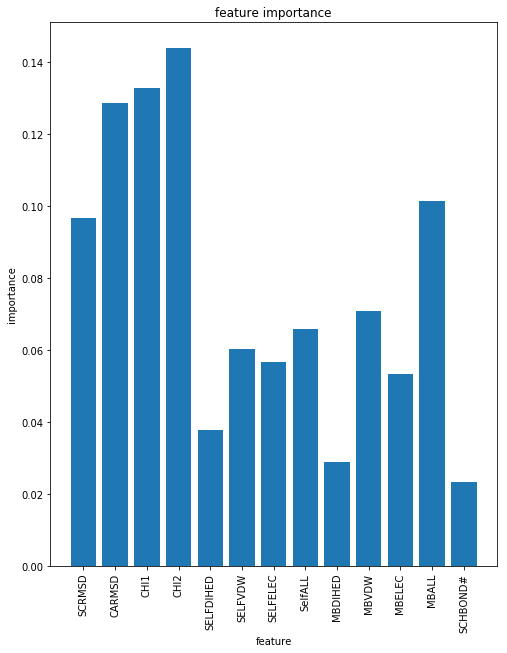

['SCRMSD', 'CARMSD', 'CHI1', 'CHI2', 'SELFDIHED', 'SELFVDW', 'SELFELEC', 'SelfALL', 'MBDIHED', 'MBVDW', 'MBELEC', 'MBALL', 'SCHBOND#']


In [113]:
featurelist=list(df.columns[1:])
plt.bar(range(len(DTmod.feature_importances_)), DTmod.feature_importances_)
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature importance")
plt.xticks(range(len(DTmod.feature_importances_)), featurelist,rotation='vertical')
plt.show()
print(featurelist)

In [114]:
#Train and fit Random Forest model.
RFmod=RandomForestClassifier(n_estimators=100,random_state=77)
RFmod.fit(X_train,y_train)
#Score RF fit.
RFmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [115]:
#Predict from manufactured test and score
RFpred = RFmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,RFpred)*100)
print('F1 score:', f1_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, RFpred))
print('Classification report:', classification_report(y_test, RFpred))

Accuracy score: 47.411764705882355
F1 score: 45.714587156141164
Recall score: 45.686265508074
Precision score: 46.59623373979149
Confusion matrix: [[250 146 316]
 [157 330 325]
 [171 226 629]]
Classification report:               precision    recall  f1-score   support

           0       0.43      0.35      0.39       712
           1       0.47      0.41      0.44       812
           2       0.50      0.61      0.55      1026

    accuracy                           0.47      2550
   macro avg       0.47      0.46      0.46      2550
weighted avg       0.47      0.47      0.47      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


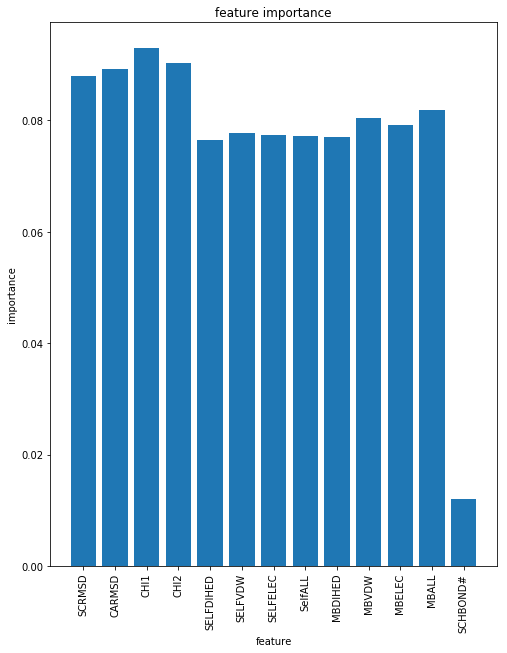

['SCRMSD', 'CARMSD', 'CHI1', 'CHI2', 'SELFDIHED', 'SELFVDW', 'SELFELEC', 'SelfALL', 'MBDIHED', 'MBVDW', 'MBELEC', 'MBALL', 'SCHBOND#']


In [116]:
featurelist=list(df.columns[1:])
plt.bar(range(len(RFmod.feature_importances_)), RFmod.feature_importances_)
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature importance")
plt.xticks(range(len(RFmod.feature_importances_)), featurelist,rotation='vertical')
plt.show()
print(featurelist)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

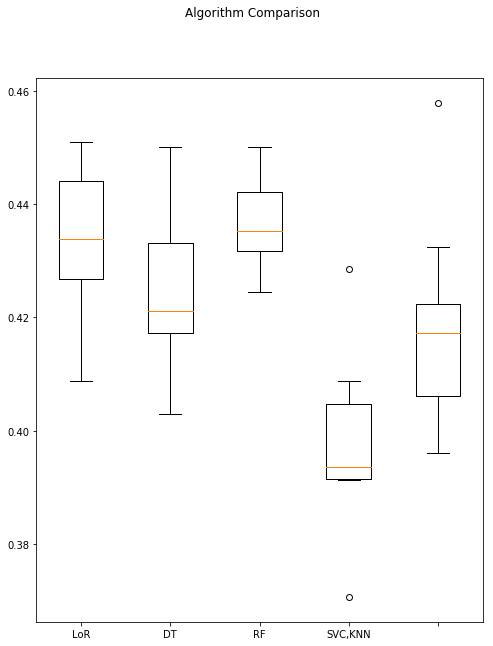

In [119]:
kfold = model_selection.KFold(n_splits=10, random_state=77)
cv_LoR = model_selection.cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=kfold, scoring='accuracy')
cv_DT = model_selection.cross_val_score(DecisionTreeClassifier(criterion='gini', random_state = 77,max_depth=10), X_train, y_train, cv=kfold, scoring='accuracy')
cv_RF = model_selection.cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=kfold, scoring='accuracy')
cv_SVC = model_selection.cross_val_score(SVC(kernel='rbf',gamma=0.2), X_train, y_train, cv=kfold, scoring='accuracy')
cv_KNN = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=60), X_train, y_train, cv=kfold, scoring='accuracy')
results=[cv_LoR,cv_DT, cv_RF,cv_SVC,cv_KNN]
names=["LoR","DT","RF","SVC,""KNN"]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()